In [50]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://api.tomorrow.io/v4/timelines"
# sirsi
# location = "14.6196,74.8441"  
# Talakaveri
# location = '12.333332,75.499998'
# location = "86.611366,20.316551"
#kurumbas Aus
location = "-17.4833314,140.83333"
current_utc = datetime.utcnow()
startTime = current_utc.strftime("%Y-%m-%dT%H:%M:%SZ")
endTime = (current_utc + timedelta(days=4)).strftime("%Y-%m-%dT%H:%M:%SZ")

querystring = {"location": location, "fields": ["temperature", "humidity", "windSpeed", "windDirection", "windGust", "rainIntensity", "precipitationType", "solarGHI", "visibility", "weatherCode"],
               "units": "metric", "timesteps": "1h","startTime":startTime,"endTime":endTime, "apikey": "ykVXLbudfrMsDIEYR8UMrJP687YGK7HA"}

response = requests.request("GET", url, params=querystring)
print(response)

loc = json.loads(response.text)
intervals = loc['data']['timelines'][0]['intervals']
loc_df = pd.DataFrame([x['values'] for x in intervals])

loc_df

<Response [200]>


,temperature,humidity,windSpeed,windDirection,windGust,rainIntensity,precipitationType,visibility,weatherCode
0,28.69,82.00,1.81,158.19,2.88,0.0000,0,16.00,1001
1,29.29,68.32,0.56,1.25,1.30,0.0156,1,16.00,1001
2,28.97,72.25,0.39,37.73,1.45,0.0547,1,16.00,1001
3,28.59,76.73,0.47,67.07,1.41,0.0000,1,16.00,1001
4,28.56,78.48,0.34,74.73,1.18,0.0000,1,16.00,1001
...,...,...,...,...,...,...,...,...,...
92,30.20,63.89,4.19,312.93,4.22,0.0000,1,24.14,1001
93,30.03,65.83,4.38,309.50,5.09,0.0000,1,24.13,1001
94,30.01,66.82,4.36,305.67,5.11,0.0000,1,24.13,1001
95,29.91,67.84,4.45,305.14,5.23,0.0000,1,24.13,1001


In [51]:
import pytz
ist = pytz.timezone('Asia/Calcutta')
loc_df2 = loc_df.assign(DateTime = [ pd.to_datetime(x['startTime']).tz_convert(ist) for x in intervals])
loc_df2.set_index('DateTime', inplace=True)

loc_df2


,temperature,humidity,windSpeed,windDirection,windGust,rainIntensity,precipitationType,visibility,weatherCode
DateTime,,,,,,,,,
2022-01-19 18:30:00+05:30,28.69,82.00,1.81,158.19,2.88,0.0000,0,16.00,1001
2022-01-19 19:30:00+05:30,29.29,68.32,0.56,1.25,1.30,0.0156,1,16.00,1001
2022-01-19 20:30:00+05:30,28.97,72.25,0.39,37.73,1.45,0.0547,1,16.00,1001
2022-01-19 21:30:00+05:30,28.59,76.73,0.47,67.07,1.41,0.0000,1,16.00,1001
2022-01-19 22:30:00+05:30,28.56,78.48,0.34,74.73,1.18,0.0000,1,16.00,1001
...,...,...,...,...,...,...,...,...,...
2022-01-23 14:30:00+05:30,30.20,63.89,4.19,312.93,4.22,0.0000,1,24.14,1001
2022-01-23 15:30:00+05:30,30.03,65.83,4.38,309.50,5.09,0.0000,1,24.13,1001
2022-01-23 16:30:00+05:30,30.01,66.82,4.36,305.67,5.11,0.0000,1,24.13,1001


In [52]:
loc_df2['2022-01-20']

,temperature,humidity,windSpeed,windDirection,windGust,rainIntensity,precipitationType,visibility,weatherCode
DateTime,,,,,,,,,
2022-01-20 00:30:00+05:30,28.51,82.41,0.42,84.57,1.04,0.0000,1,16.00,1001
2022-01-20 01:30:00+05:30,28.42,82.21,0.21,132.87,1.49,0.0000,1,16.00,1001
2022-01-20 02:30:00+05:30,27.89,84.25,0.86,100.60,2.93,2.9165,1,16.00,4001
2022-01-20 03:30:00+05:30,26.18,89.61,4.62,31.13,7.18,10.2525,1,3.60,4201
2022-01-20 04:30:00+05:30,26.23,86.62,1.18,102.61,2.84,0.1794,1,7.68,1001
2022-01-20 05:30:00+05:30,26.45,86.49,1.97,268.36,3.95,0.2180,1,7.28,1001
2022-01-20 06:30:00+05:30,27.64,81.22,1.86,233.80,4.24,0.0378,1,15.24,1001
2022-01-20 07:30:00+05:30,28.48,77.75,1.52,259.15,4.22,0.0815,1,15.06,1001
2022-01-20 08:30:00+05:30,28.94,76.79,1.90,276.19,4.61,0.0772,1,16.00,1001


In [53]:
weather_code_map = {0: 'Unknown',
1000: 'Clear',
1001: 'Cloudy',
1100: 'Mostly Clear',
1101: 'Partly Cloudy',
1102: 'Mostly Cloudy',
2000: 'Fog',
2100: 'Light Fog',
3000: 'Light Wind',
3001: 'Wind',
3002: 'Strong Wind',
4000: 'Drizzle',
4001: 'Rain',
4200: 'Light Rain',
4201: 'Heavy Rain',
5000: 'Snow',
5001: 'Flurries',
5100: 'Light Snow',
5101: 'Heavy Snow',
6000: 'Freezing Drizzle',
6001: 'Freezing Rain',
6200: 'Light Freezing Rain',
6201: 'Heavy Freezing Rain',
7000: 'Ice Pellets',
7101: 'Heavy Ice Pellets',
7102: 'Light Ice Pellets',
8000: 'Thunderstorm'}




In [54]:
loc_df2['weatherCode'] = [weather_code_map[x] for x in loc_df2['weatherCode']]

In [55]:
loc_df2

,temperature,humidity,windSpeed,windDirection,windGust,rainIntensity,precipitationType,visibility,weatherCode
DateTime,,,,,,,,,
2022-01-19 18:30:00+05:30,28.69,82.00,1.81,158.19,2.88,0.0000,0,16.00,Cloudy
2022-01-19 19:30:00+05:30,29.29,68.32,0.56,1.25,1.30,0.0156,1,16.00,Cloudy
2022-01-19 20:30:00+05:30,28.97,72.25,0.39,37.73,1.45,0.0547,1,16.00,Cloudy
2022-01-19 21:30:00+05:30,28.59,76.73,0.47,67.07,1.41,0.0000,1,16.00,Cloudy
2022-01-19 22:30:00+05:30,28.56,78.48,0.34,74.73,1.18,0.0000,1,16.00,Cloudy
...,...,...,...,...,...,...,...,...,...
2022-01-23 14:30:00+05:30,30.20,63.89,4.19,312.93,4.22,0.0000,1,24.14,Cloudy
2022-01-23 15:30:00+05:30,30.03,65.83,4.38,309.50,5.09,0.0000,1,24.13,Cloudy
2022-01-23 16:30:00+05:30,30.01,66.82,4.36,305.67,5.11,0.0000,1,24.13,Cloudy


In [56]:
loc_df2['weatherCode'].value_counts()

Cloudy           68
Drizzle          10
Rain              6
Light Rain        4
Mostly Clear      3
Heavy Rain        2
Mostly Cloudy     2
Partly Cloudy     2
Name: weatherCode, dtype: int64

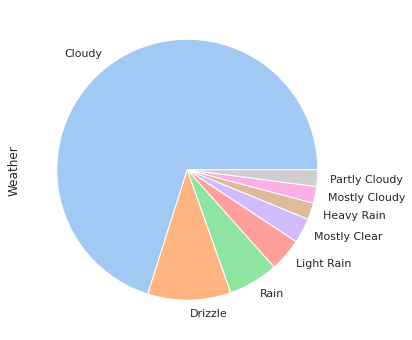

In [57]:
weather = dict(loc_df2['weatherCode'].value_counts())
series = pd.Series(weather.values(), index=weather.keys(), name="Weather")
series.plot.pie(figsize=(6, 6))

In [59]:
today= loc_df2['2022-01-20 05':'2022-01-20 22']
print("Weather on specified Date")
today['weatherCode'].value_counts().head(1)

Weather on specified Date


Cloudy    16
Name: weatherCode, dtype: int64

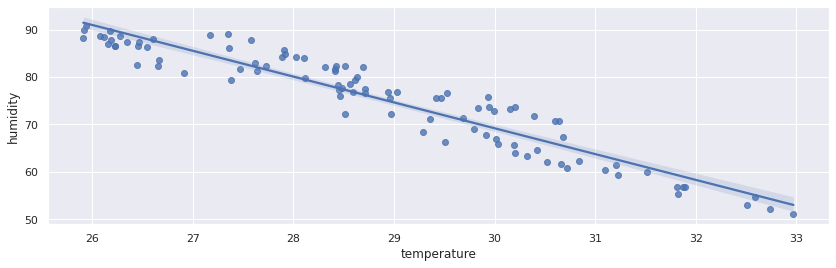

In [60]:
sns.set(rc={'figure.figsize':(14,4)})
sns.set(style="darkgrid")
sns.regplot(x=loc_df2['temperature'],y= loc_df2['humidity'])

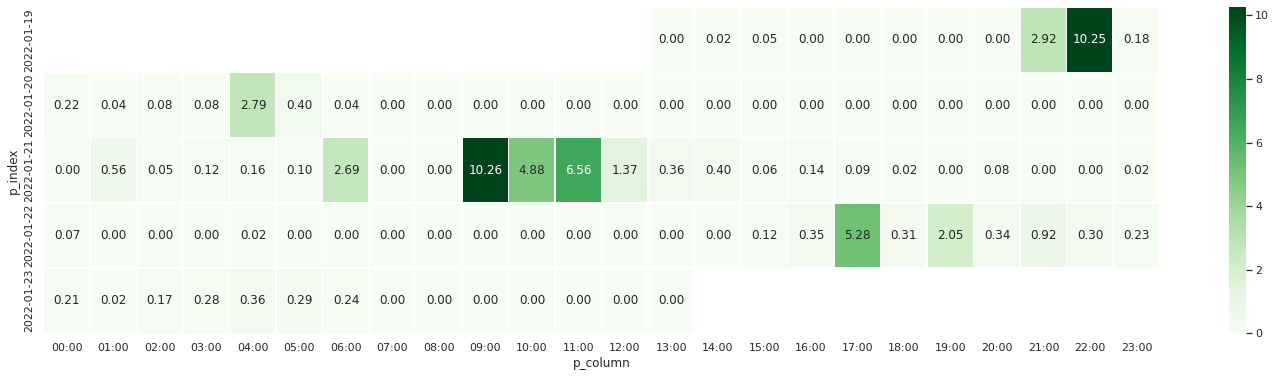

In [61]:
Date= [i["startTime"][:10] for i in intervals]
Time = [i["startTime"][11:16] for i in intervals]
demo_df =pd.DataFrame({'Date':Date,'Time':Time,'rainIntensity':loc_df2['rainIntensity']})

sns.set_theme(style="whitegrid", palette="pastel")

heatmap_p = demo_df.pivot("Date", "Time","rainIntensity")

f, ax = plt.subplots(figsize=(25, 6))
# YlOrBr
sns.heatmap(heatmap_p, annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap="Greens")

In [ ]:
loc_df2.describe()

In [62]:

rainhours = dayselect[(dayselect['precipitationType']==1) & (dayselect['rainIntensity']>0)].loc["2022-01-20"]

rainhours[['rainIntensity','weatherCode','visibility']]

,rainIntensity,weatherCode,visibility
DateTime,,,
2022-01-20 02:30:00+05:30,2.9165,Rain,16.00
2022-01-20 03:30:00+05:30,10.2525,Heavy Rain,3.60
2022-01-20 04:30:00+05:30,0.1794,Cloudy,7.68
2022-01-20 05:30:00+05:30,0.2180,Cloudy,7.28
2022-01-20 06:30:00+05:30,0.0378,Cloudy,15.24
2022-01-20 07:30:00+05:30,0.0815,Cloudy,15.06
2022-01-20 08:30:00+05:30,0.0772,Cloudy,16.00
2022-01-20 09:30:00+05:30,2.7904,Rain,15.63
2022-01-20 10:30:00+05:30,0.4017,Drizzle,5.00


In [63]:
print("Total Rainfall %.2f"%(rainhours['rainIntensity'].sum()))



Total Rainfall 16.99


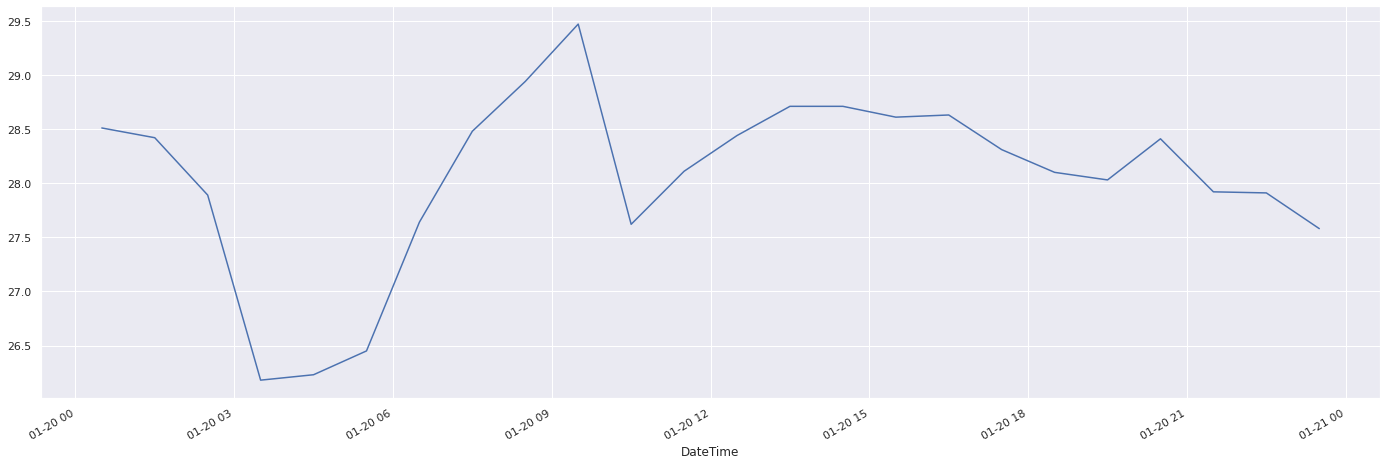

In [64]:
plt.style.use("dark_background")
sns.set(rc={'figure.figsize':(24,8)})
loc_df2.loc['2022-01-20','temperature'].plot()
# loc_df2['temperature'].plot()

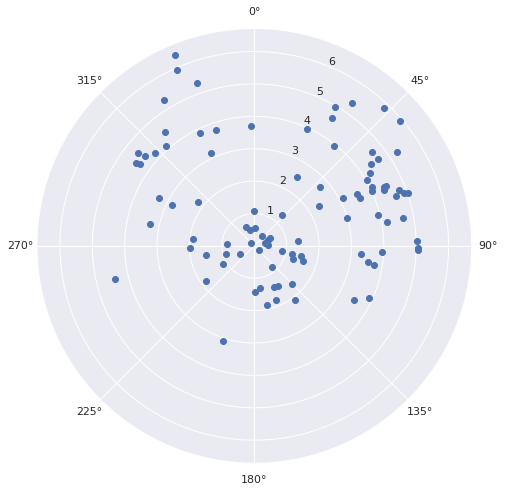

In [65]:
from math import radians
ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in loc_df2['windDirection'].values], y=loc_df2['windSpeed'].values)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

In [39]:

# today= loc_df2['2022-01-19 00':'2022-01-19 23']
# plt.figure(figsize =(14,6))
# plt.plot(today.index,today['temperature'],today.index,today['humidity'])

In [ ]:

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(loc_df2.index,loc_df2['temperature'], color ='maroon', width = 0.03)
# plt.xlabel("date")
# plt.ylabel("Temperature")
# plt.show()

In [ ]:

# plt.figure(figsize =(14,6))
# plt.plot(loc_df2.index,loc_df2['temperature'],loc_df2.index,loc_df2['humidity'])

In [ ]:
# loc_df2.loc['2022-01-17','temperature'].plot(kind='box')

In [ ]:
# fig, ax =plt.subplots()
# ax.imshow(loc_df['weatherCode'])